In [29]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
import numpy as np
import contextily as ctx
import mapclassify

In [30]:
# Reading data from the shapefile 
merida20 = gpd.read_file("merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp")
merida20 = merida20[['CVEGEO', 'POBTOT', 'geometry']]
merida20.rename(columns={'POBTOT':'POBTOT2020'},
               inplace=True)
# Reprojecting to projected coordinate system
merida20 = merida20.to_crs(epsg=4485)
merida20.head()

,CVEGEO,POBTOT2020,geometry
0,3105000010027,21,"POLYGON ((2754849.653 2488201.053, 2754860.000..."
1,3105000010031,253,"POLYGON ((2771776.890 2478590.322, 2771690.909..."
2,3105000010120,1444,"POLYGON ((2764143.656 2479289.504, 2764145.335..."
3,3105000010154,186,"POLYGON ((2752865.731 2469623.554, 2752868.219..."
4,3105000010169,1580,"POLYGON ((2761880.766 2478332.690, 2761889.991..."


In [31]:
# Reading data from the shapefile 
merida10 = gpd.read_file("merida_kanasin_2010/merida_kanasin2010.shp")
merida10 = merida10[['CVEGEO', 'pobtot']]
merida10.rename(columns={'pobtot':'POBTOT2010'},
               inplace=True)
merida10.head()

,CVEGEO,POBTOT2010
0,3105000010120,1642.0
1,3105000010169,1618.0
2,3105000010188,1709.0
3,310500001021A,1666.0
4,3105000010224,926.0


In [32]:
merida2010_20 = merida20.merge(merida10, on=['CVEGEO'], how='outer')
merida2010_20 = merida2010_20.dropna()

In [33]:
merida2010_20.isnull().sum()

CVEGEO        0
POBTOT2020    0
geometry      0
POBTOT2010    0
dtype: int64

In [34]:
merida2010_20 = merida2010_20[['CVEGEO', 'POBTOT2010','POBTOT2020', 'geometry']]
merida2010_20
merida2010_20.to_file("pobtotComparation20102020Re.shp")

In [35]:
total2010 = merida2010_20['POBTOT2010'].sum()
total2020 = merida2010_20['POBTOT2020'].sum()

In [36]:
merida2010_20['Difference'] = (((merida2010_20['POBTOT2010']/total2010) - (merida2010_20['POBTOT2020']/total2020)))
merida2010_20['Difference'].head()

2    0.000413
4    0.000247
5    0.000394
6    0.000311
7    0.000355
Name: Difference, dtype: float64

In [37]:
#merida2010_20['Difference'].sort_values()
meridaNeg = (merida2010_20.loc[merida2010_20['Difference'] < 0])
meridaPos = merida2010_20.loc[merida2010_20['Difference'] >= 0]

In [38]:
meridaNeg['Difference'] = meridaNeg['Difference'].abs()

In [39]:
meridaNeg.head()

,CVEGEO,POBTOT2010,POBTOT2020,geometry,Difference
50,310500001078A,982.0,1455.0,"POLYGON ((2758565.513 2467497.722, 2758573.397...",0.000356
65,3105000011523,1539.0,1795.0,"POLYGON ((2760660.349 2482741.857, 2760773.799...",0.000063
66,3105000011542,1173.0,1715.0,"POLYGON ((2760506.936 2481992.726, 2760509.643...",0.000401
67,3105000011557,804.0,1307.0,"POLYGON ((2761966.613 2482435.025, 2761969.269...",0.000409
68,3105000011561,1212.0,1582.0,"POLYGON ((2761057.169 2480685.336, 2761045.339...",0.000221


In [40]:
meridaPos.head()

,CVEGEO,POBTOT2010,POBTOT2020,geometry,Difference
2,3105000010120,1642.0,1444.0,"POLYGON ((2764143.656 2479289.504, 2764145.335...",0.000413
4,3105000010169,1618.0,1580.0,"POLYGON ((2761880.766 2478332.690, 2761889.991...",0.000247
5,3105000010188,1709.0,1538.0,"POLYGON ((2764110.007 2478349.070, 2764166.774...",0.000394
6,310500001021A,1666.0,1571.0,"POLYGON ((2760966.319 2476809.061, 2760907.648...",0.000311
7,3105000010224,926.0,694.0,"POLYGON ((2761747.489 2477244.065, 2761744.829...",0.000355


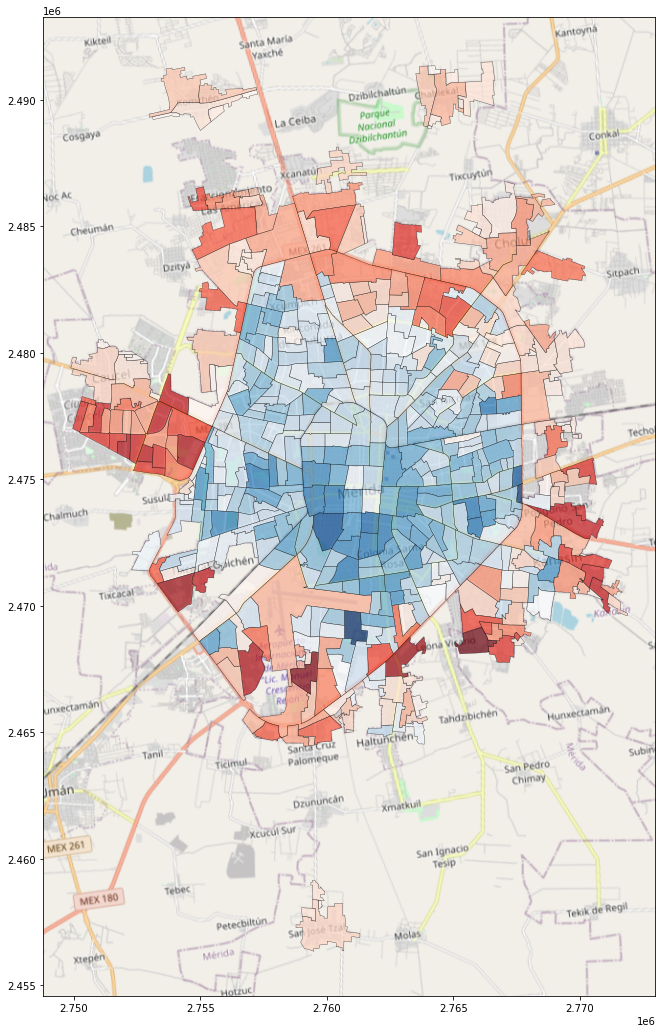

In [41]:
f, ax = plt.subplots(1, figsize=(18, 18))
meridaNeg.plot(ax=ax, column='Difference',
               scheme='fisherjenks', k=19,
         cmap='Reds' , edgecolor='black',
        linewidth=0.4, 
        alpha=0.7, 
       )
meridaPos.plot(ax=ax, column='Difference',  
               scheme='fisherjenks', k=19,
         cmap='Blues' , edgecolor='black',
        linewidth=0.4, 
        alpha=0.7
       )
contextily.add_basemap(ax, crs=merida2010_20.crs, url=ctx.tile_providers.OSM_A)
plt.savefig('prueba4.jpg')